In [10]:
#import the data frame
import pandas as pd

In [11]:
df_w_outliers = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Data_Set_WITH_Outliers.csv')

In [12]:
df_w_outliers.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
       'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
       'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
       'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
       'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
       'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
       'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
       

In [13]:
X = df_w_outliers.drop(columns=['length_of_stay', 'length_of_stay_hours'])

In [14]:
y = df_w_outliers['length_of_stay_hours']

In [15]:
X

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292346,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
292347,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
292348,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
292349,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y

0          18.866667
1          24.366667
2          42.100000
3          53.333333
4         108.933333
             ...    
292346    132.733333
292347    240.266667
292348    167.916667
292349     83.800000
292350    207.316667
Name: length_of_stay_hours, Length: 292351, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

NameError: name 'RandomForestRegressor' is not defined

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr.score(X_test, y_test)

0.17742813078326458

In [23]:
lr.score(X_train, y_train)

0.1780551230947679

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
y_pred = lr.predict(X_test)

In [26]:
mean_absolute_error(y_test, y_pred)

83.55927502693703

In [27]:
mean_squared_error(y_test, y_pred)

24081.001490776307

In [28]:
r2_score(y_test, y_pred)

0.17742813078326458

In [29]:
lr.coef_

array([-4.56510365e-09,  2.82263685e-08, -5.58872445e-01,  5.25043794e+01,
        2.64664093e+01, -4.28253286e-01,  4.07548168e+00,  2.06909249e+01,
       -1.98942127e+00,  1.62719364e+00,  1.20592119e-01,  1.01739918e+01,
       -6.72523972e+00, -7.02396418e+00,  1.51840037e+01, -1.94278032e+01,
       -1.16025159e+01, -1.92945063e+01, -2.99286510e+00, -2.57214429e+00,
       -3.64654854e+00, -1.18801859e+01, -6.08132637e+00, -1.01482940e+01,
       -7.57272195e+00, -7.46916244e+00, -2.11011032e+01, -2.12556291e+00,
        1.34593600e+00,  1.33225609e+01, -7.44522848e+00,  3.01812906e+00,
        8.61961357e+00, -2.25448115e-01,  7.41956879e+00, -9.54815213e+00,
        1.72891358e+00, -1.35533362e+01, -1.08338236e+01, -4.50342838e+00,
       -1.25104616e+01, -9.74240890e+00, -1.36369270e+00, -1.59362418e+01,
        6.16737814e+01, -9.41254091e+00,  4.49942693e+01,  6.85882276e-01,
        5.08224376e+01,  5.60069871e+01,  4.41482232e+01,  3.68724034e+01,
       -1.56861372e+01, -

In [30]:
lr.intercept_

-24.08985355844311

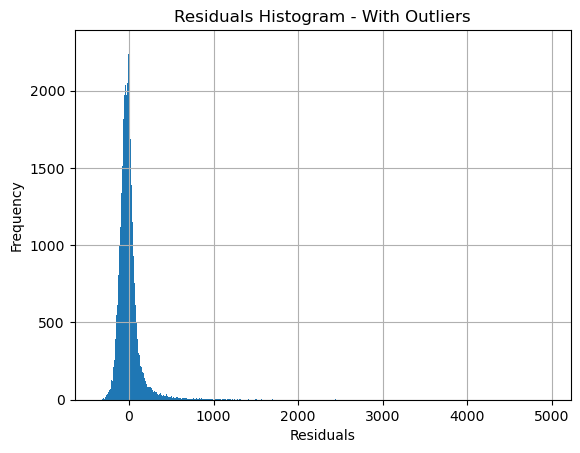

In [37]:
import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.hist(residuals, bins=800)  # Adjust the number of bins as needed
plt.title('Residuals Histogram - With Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()